<a href="https://colab.research.google.com/github/DangLeUyen/Computer-Vision-From-Scratch/blob/main/flowers_classification_transfer_learning_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 flowers classification by leveraging a pretrained model

The following code is based on the book **Practical Machine Learning for Computer Vision** by Valliappa Lakshmanan, Martin Gorner, and Ryan Gillard.

- *Pretrained model*: is a neural network that has aldready learned to extract features like: edges, textures, shapes, object parts, full objects ...

- *Transfer Learning*: taking a model trained on one task and reusing it for a new task. There are two main types of transfer learning:
  - Fixed feature extractor: freeze the pretrained model and use it to extract features. We use this type of transfer learning when small dataset similar to original dataset.
  - Fine-tuning: unfreeze a few top layers and retrain slightly for better adaptation. We use this for medium-sized dataset with slightly different task.


### Import necessary libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.core import history
import PIL
import pathlib

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Common functions

In [3]:
def train(train_dataset, validation_dataset, model, num_epochs=10):

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy']
    )

  callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)]

  history = model.fit(train_dataset,
              validation_data = validation_dataset,
              epochs = num_epochs,
              callbacks = callbacks
              )
  return history

def plot_results(history):
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label = 'validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()



### Load datasets

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
data_dir = pathlib.Path(data_dir)
list(data_dir.glob('flower_photos/*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/flower_photos/daisy/1392131677_116ec04751.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/16492248512_61a57dfec1_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/9161647994_e39b65cb9c_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8021540573_c56cf9070d_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2538504987_fe524b92a8_n.jpg')]

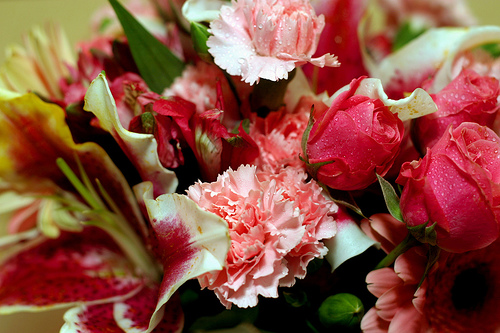

In [6]:

roses = list(data_dir.glob('flower_photos/roses/*'))
PIL.Image.open(str(roses[0]))


In [8]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
BATCH_SIZE = 64
NUM_EPOCHS = 15

data_dir = pathlib.Path('datasets/flower_photos/flower_photos')

train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

CLASS_NAMES = train_dataset.class_names
print("Classes:", CLASS_NAMES)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(AUTOTUNE)
val_dataset   = val_dataset.prefetch(AUTOTUNE)


In [10]:
for images, labels in train_dataset.take(1):
    print(labels)
    print(labels.dtype)


tf.Tensor(
[1 0 4 3 1 2 0 4 4 1 1 4 3 1 1 4 0 3 3 1 1 1 3 2 4 4 4 3 2 2 0 3 0 2 4 4 4
 1 1 1 1 1 3 0 1 2 3 0 1 3 0 0 4 3 4 2 4 1 4 1 4 0 2 0], shape=(64,), dtype=int32)
<dtype: 'int32'>


for images, labels in train_dataset.take(1):
    print(images.shape, labels.shape)


### Training without fine-tuning

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 61s 860ms/step - accuracy: 0.3004 - loss: 1.8633 - val_accuracy: 0.4659 - val_loss: 1.3267
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.5212 - loss: 1.2787 - val_accuracy: 0.6035 - val_loss: 1.0653
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.6096 - loss: 1.0264 - val_accuracy: 0.6839 - val_loss: 0.9047
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.6822 - loss: 0.8676 - val_accuracy: 0.7275 - val_loss: 0.8006
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.7300 - loss: 0.7445 - val_accuracy: 0.7575 - val_loss: 0.7276
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.7582 - loss: 0.6592 - val_accuracy: 0.7766 - val_loss: 0.6764
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.7712 - loss: 0.6262 - val_accuracy: 0.7888 - val_loss: 0.6375
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,287,441 (8.73 MB)

 Trainable params: 8,965 (35.02 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

 Optimizer params: 17,932 (70.05 KB)

None


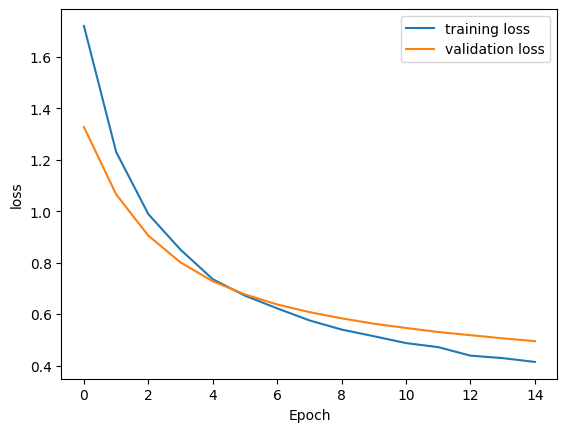

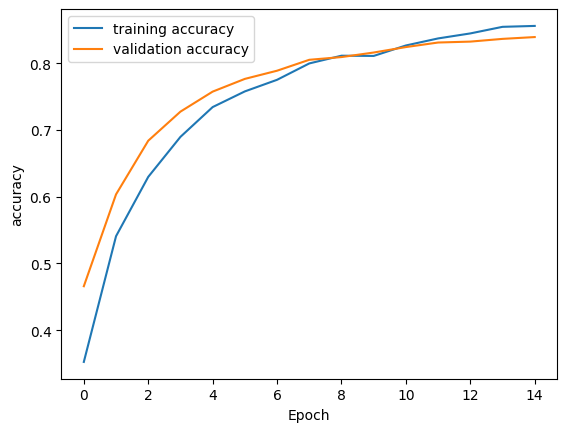

In [11]:
# Use MobileNetV2 as base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                                               include_top=False, # Remove ImageNet head
                                               weights='imagenet')

# Freeze base model
base_model.trainable = False

model1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])

history1 = train(train_dataset, val_dataset, model1, num_epochs=NUM_EPOCHS)
print(model1.summary())
plot_results(history1)


### Training with fine-tuning

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6615 - loss: 0.9615 - val_accuracy: 0.7139 - val_loss: 0.7350
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.9763 - loss: 0.0937 - val_accuracy: 0.7943 - val_loss: 0.5517
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.9947 - loss: 0.0361 - val_accuracy: 0.8392 - val_loss: 0.4835
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9999 - loss: 0.0155 - val_accuracy: 0.8665 - val_loss: 0.4067
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 0.8706 - val_loss: 0.3976
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.8774 - val_loss: 0.3883
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.8733 - val_loss: 0.4054
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - accuracy: 0.9998 - loss: 0.0061 - val_accura

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,735,185 (25.69 MB)

 Trainable params: 2,232,837 (8.52 MB)

 Non-trainable params: 36,672 (143.25 KB)

 Optimizer params: 4,465,676 (17.04 MB)

None


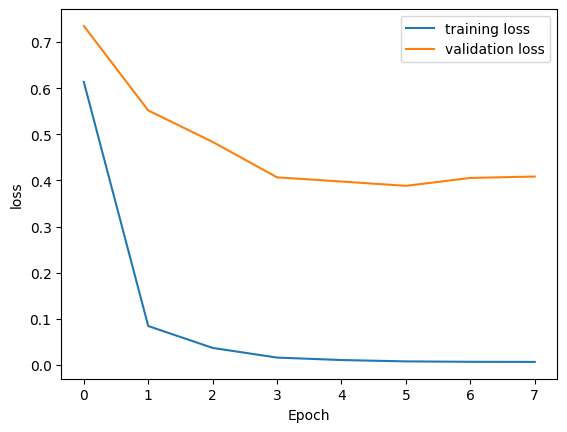

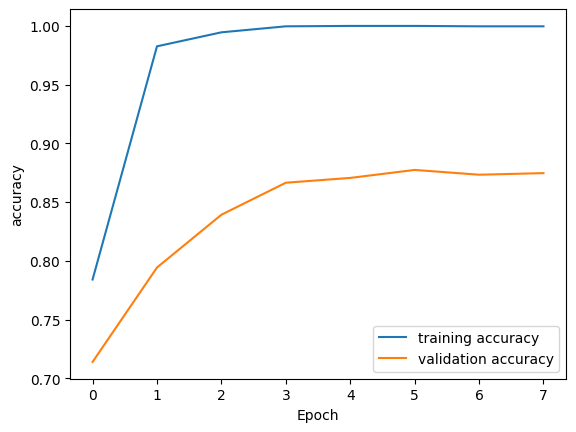

In [13]:
# Use MobileNetV2 as base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                                               include_top=False, # Remove ImageNet head
                                               weights='imagenet')

# Unfreeze top layers
base_model.trainable = True

model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])

history2 = train(train_dataset, val_dataset, model2, num_epochs=NUM_EPOCHS)
print(model2.summary())
plot_results(history2)
